# EDA On Diwali Sales Dataset

# About the Data

* This dataset is taken from kaggle open source data https://www.kaggle.com/datasets/saadharoon27/diwali-sales-dataset

* Dataset contain the sales data of different products in India.This data has been taken from the Kaggle dataset. Dataset contain informations regarding the age, state, product, occupation, marital_status, amount of purchase, product_id, customer name and Number of orders per userId.
* This analysis will be a exploratory data analysis and we will try to figure out some important insights from the data in order to make a data informed decision.

* Dataset contain 11,251 rows and 15 columns. This is a big data but we can not generalize the concept for whole population but will try to figure out some strong insights that could help the users of this report to increase their sales.

# Importing Python Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\user\\Downloads'

# Load the Data

In [3]:
df = pd.read_csv("C:\\Users\\user\\Downloads\Diwali_Sales_Data.csv",encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# Data Cleaning

### Dropped columns with excessive null values

In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

### Performing Missing Values Test and Treat it

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
if df['Amount'].isnull().sum() > 0:
    df['Amount'].fillna(df['Amount'].mean(),inplace=True)

### Changing data type of column 'Amount'

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

### Re-name values of specific columns for better understanding

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace({0: "Unmarried", 1: "Married"})

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


In [13]:
df['Gender'] = df['Gender'].replace({'F' : 'Female', 'M' : 'Male'})

In [14]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11246,1000695,Manning,P00296942,Male,18-25,19,Married,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,Male,26-35,33,Unmarried,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,Female,36-45,40,Unmarried,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,Male,36-45,37,Unmarried,Karnataka,Southern,Agriculture,Office,3,206
11250,1002744,Brumley,P00281742,Female,18-25,19,Unmarried,Maharashtra,Western,Healthcare,Office,3,188


In [15]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11251.000000,11251.000000,11251.000000
mean,35.421207,9453.609901,2.489290
std,12.754122,5219.569169,1.115047
min,12.000000,188.000000,1.000000
25%,27.000000,5443.500000,1.500000
50%,33.000000,8110.000000,2.000000
75%,43.000000,12671.000000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis

### Sex Ratio

In [16]:
gender_count=df['Gender'].value_counts()
gender_count

Gender
Female    7842
Male      3409
Name: count, dtype: int64

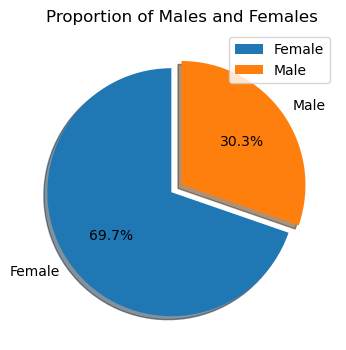

In [17]:
plt.figure(figsize=[4,5])
plt.pie(gender_count,labels=gender_count.index,autopct="%1.1f%%",shadow=True,startangle=90,explode=[0.1,0.0])
plt.title('Proportion of Males and Females')
plt.legend(loc='best')
plt.show()

* ##### females make up a significant majority in the population

### Amount spent by each Gender and discriminate them with 'Marital_Status'

In [18]:
sales_gen_df=df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
sales_gen_df

,Marital_Status,Gender,Amount
0,Married,Female,30615378
1,Married,Male,13583991
2,Unmarried,Female,43815005
3,Unmarried,Male,18348191


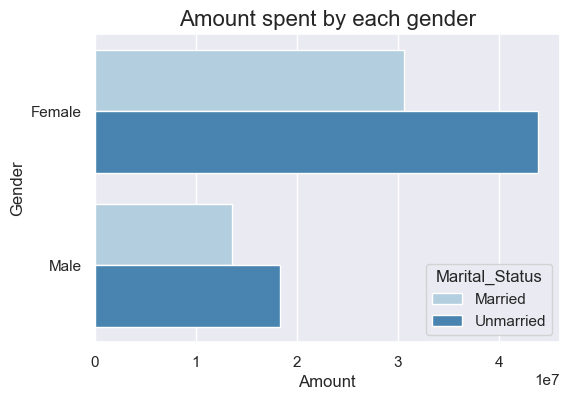

In [19]:
plt.figure(figsize=[6,4])
sns.set(style='darkgrid')
sns.barplot(x='Amount',y='Gender',data= sales_gen_df, hue='Marital_Status', palette = 'Blues')
plt.title('Amount spent by each gender', fontsize= 16)
plt.show()

* ##### Unmarried females appear to be the most conservative spenders, while married males lead in expenditure

### Checking Distribution of numeric columns 'Age', 'Amount', 'Orders' to detect Skewness

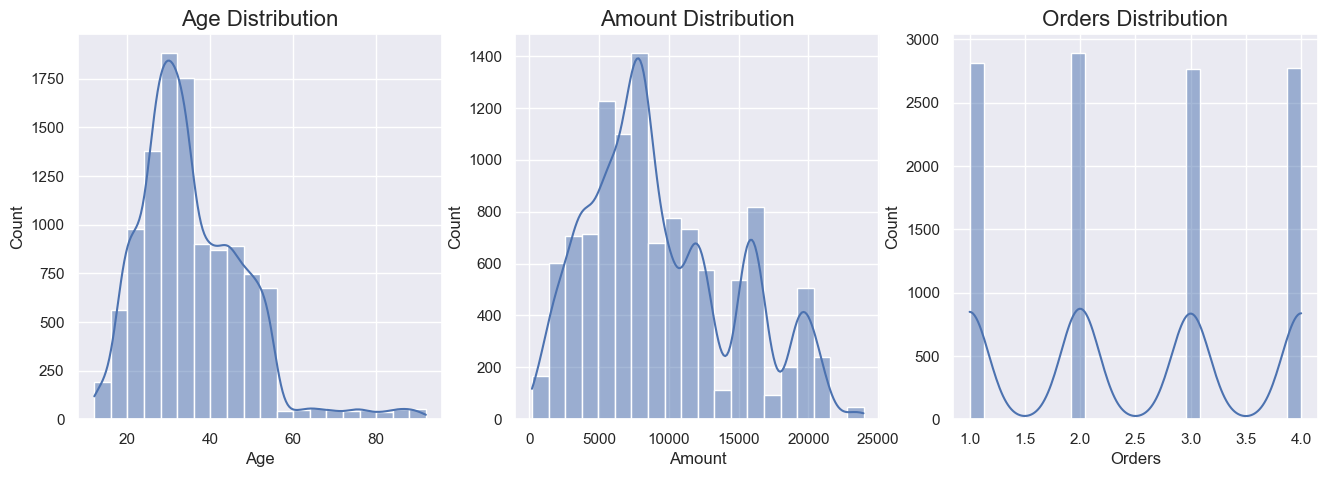

In [20]:
fig, ax= plt.subplots(nrows= 1, ncols= 3, figsize= (16,5))
sns.histplot(x='Age', data= df, bins= 20, kde= True, ax= ax[0])
ax[0].set_title('Age Distribution', fontsize= 16)
sns.histplot(x= 'Amount', data= df, kde=True, bins= 20, ax= ax[1])
ax[1].set_title('Amount Distribution', fontsize= 16)
sns.histplot(x= 'Orders', data= df, kde=True,  ax= ax[2])
ax[2].set_title('Orders Distribution', fontsize= 16)
plt.show()

* ##### High positive skewness in age suggests that most of the customers are younger, with fewer older customers.
* ##### Order distribution indicates a multi-modal distribution, suggesting that there are distinct groups within the data with different ordering behaviors.
* ##### The Amount distribution's skewness shows a positive skewness, indicating that while most customers spend moderate amount, there are a few high spenders.

### Discrimate Gender over different Age group

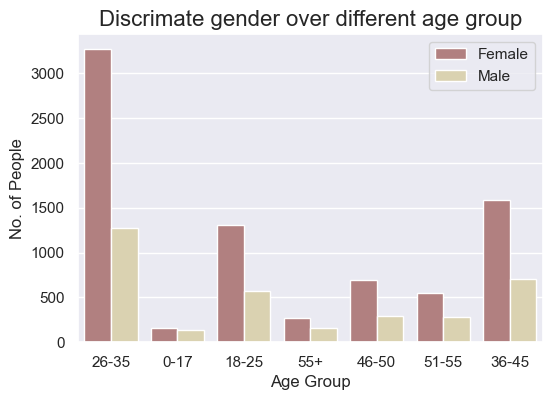

In [21]:
sns.set(style='darkgrid')
plt.figure(figsize=[6,4])
sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette = 'pink')
plt.title('Discrimate gender over different age group', fontsize= 16)
plt.ylabel('No. of People')
plt.legend(loc='best')
plt.show()

* ##### This shows that most of the customers belong within the age group of '26-35' and '36-45'.

### Age Group vs Orders

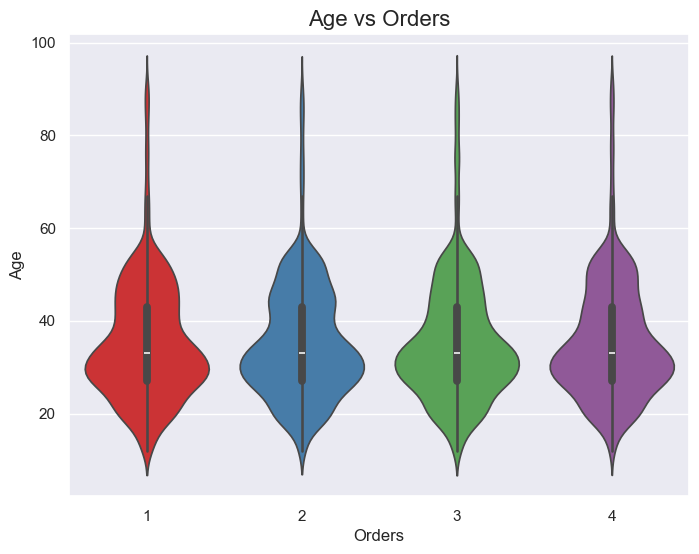

In [22]:
plt.figure(figsize=[8,6])
sns.violinplot(x = 'Orders',y= 'Age',data = df, palette = 'Set1')
plt.title('Age vs Orders', fontsize= 16)
plt.show()

* ##### Most customers being within the 20-60 age range. The thin lines extending from the violins shows that there are a few outliers in the higher age range, indicating that some older customers have placed orders.

### Age vs Amount

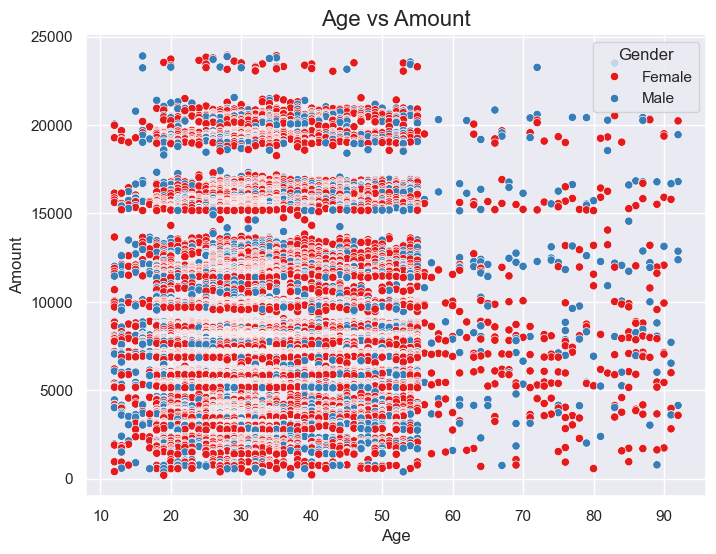

In [23]:
plt.figure(figsize=[8,6])
sns.scatterplot(x = 'Age',y= 'Amount', hue= 'Gender', data= df, palette= 'Set1')
plt.title('Age vs Amount', fontsize= 16)
# plt.yticks([1,2,3,4])
plt.show()

* ##### Female Customer within 20-60 age range spend more amount and more the age increases, the amounts are decreasing.

### Top 10 states with most no. of orders

In [24]:
Orders_State = df.groupby('State')['Orders'].sum().reset_index().sort_values(by='Orders',ascending = False)
Orders_State

,State,Orders
14,Uttar Pradesh,4813
10,Maharashtra,3811
7,Karnataka,3241
2,Delhi,2744
9,Madhya Pradesh,2259
0,Andhra Pradesh,2054
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1070


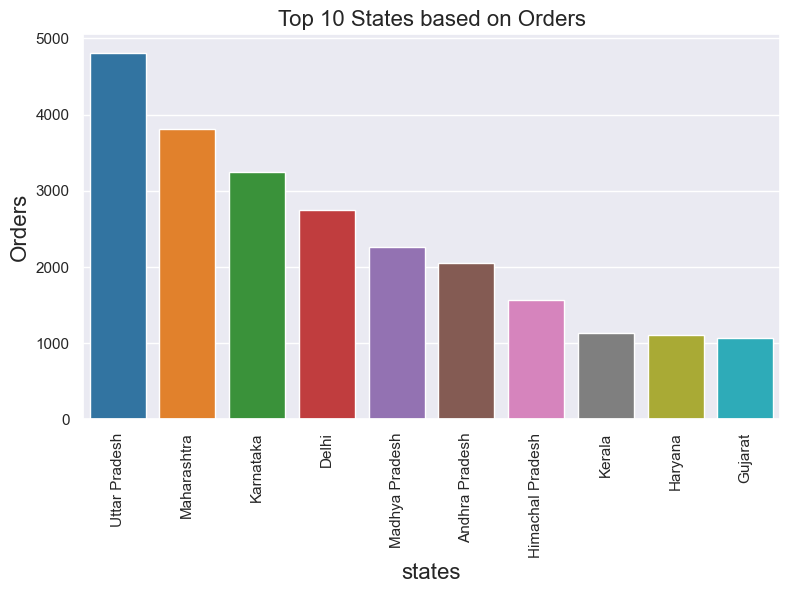

In [25]:
sns.set(style='darkgrid')
plt.figure(figsize=[9,5])
sns.barplot(data = Orders_State.head(10), x = 'State',y= 'Orders',palette = 'tab10')
plt.xlabel('states',fontsize=16)
plt.ylabel('Orders',fontsize=16)
plt.xticks(rotation= 90)
plt.title('Top 10 States based on Orders',fontsize=16)
plt.show()

* ##### U.P and Maharastra leads with most no. of orders and there is diverse customers behaviors among the states.

### Trend of revenue based on states

In [26]:
grouped_state = df.groupby("State")["Amount"].sum().reset_index().sort_values(by= 'Amount', ascending= False)
grouped_state

,State,Amount
14,Uttar Pradesh,19393874
10,Maharashtra,14436996
7,Karnataka,13532993
2,Delhi,11632177
9,Madhya Pradesh,8120048
0,Andhra Pradesh,8046599
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3964988


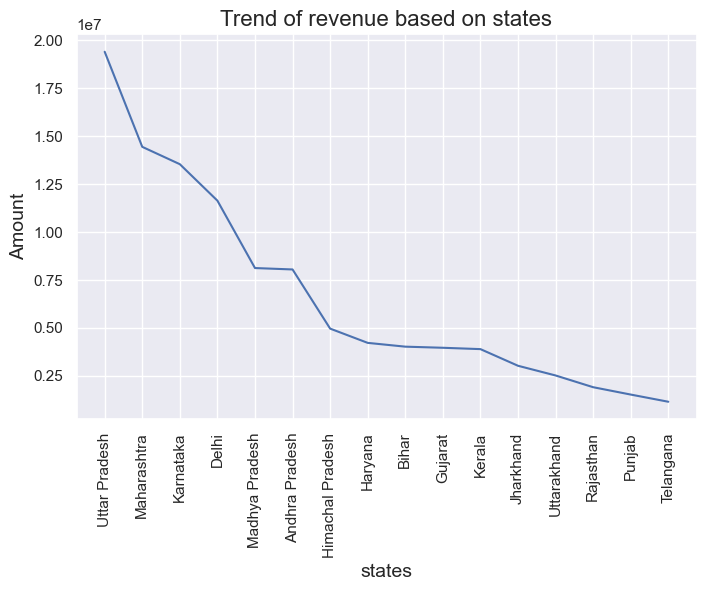

In [27]:
plt.figure(figsize=[8,5])
sns.lineplot(data = grouped_state, x = 'State',y= 'Amount')
plt.xlabel('states',fontsize=14)
plt.xticks(rotation= 90)
plt.ylabel('Amount',fontsize=14)
plt.title('Trend of revenue based on states',fontsize=16)
plt.show()

* ##### Uttar Pradesh indicates a high-market value where customers are willing to spend more.

### Customers demographics

In [28]:
Zonal_Distribution= df['Zone'].value_counts()
Zonal_Distribution

Zone
Central     4296
Southern    2695
Western     1955
Northern    1491
Eastern      814
Name: count, dtype: int64

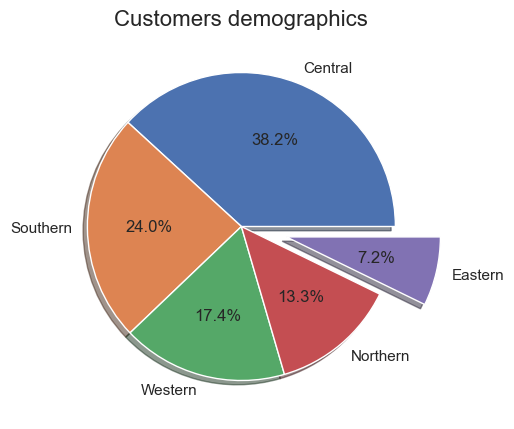

In [29]:
plt.figure(figsize=[8,5])
plt.pie(Zonal_Distribution, labels= Zonal_Distribution.index, autopct= '%1.1f%%', 
        explode= (0.0,0.0,0.0,0.0,0.3),shadow= True)
plt.title('Customers demographics', fontsize= 16)
plt.show()

* ##### Central region holds largest customer base, indicating significant market activity

### Zone vs Amount

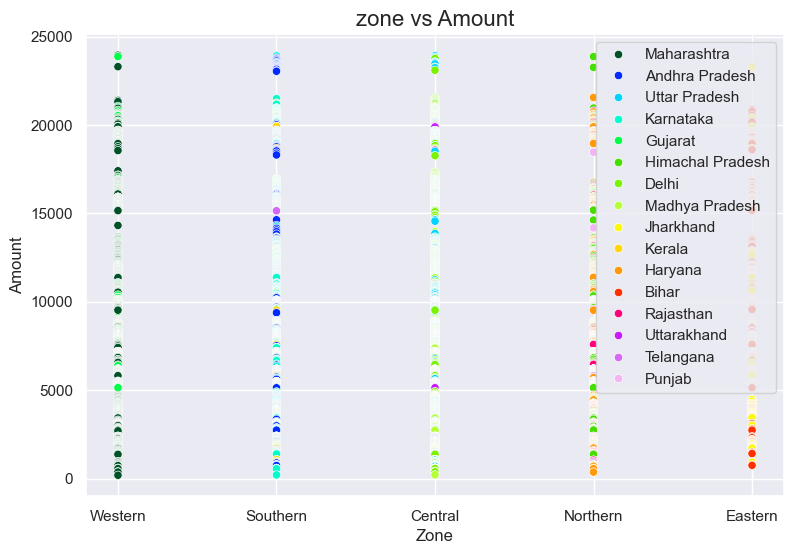

In [30]:
plt.figure(figsize= [9,6])
sns.scatterplot(x='Zone', y= 'Amount', hue= 'State', data=df,palette = 'gist_ncar')
plt.title('zone vs Amount',fontsize=16)
plt.legend()
plt.show()

### Amount spent by each Occupation

In [31]:
Sales_Occupation = df.groupby('Occupation')['Amount'].sum().reset_index()
Sales_Occupation

,Occupation,Amount
0,Agriculture,2593087
1,Automobile,5378049
2,Aviation,12602298
3,Banking,10789516
4,Chemical,5306889
5,Construction,3597511
6,Food Processing,4070670
7,Govt,8517212
8,Healthcare,13034586
9,Hospitality,6395311


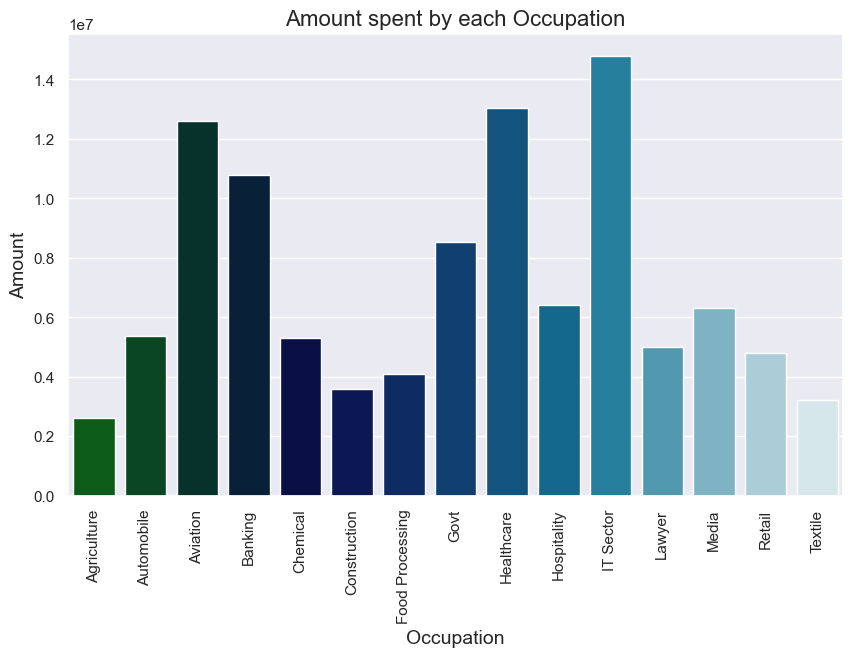

In [32]:
plt.figure(figsize=[10,6])
sns.barplot(x = 'Occupation',y= 'Amount',data= Sales_Occupation, palette = 'ocean')
plt.xlabel('Occupation',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.xticks(rotation= 90)
plt.title('Amount spent by each Occupation',fontsize=16)
plt.show()

* ##### Customer, working at IT Sector, Healthcare and Aviation have higher spending pattern

### Top selling (10) Product Categroy

In [33]:
product= df.groupby('Product_Category')['Orders'].sum().reset_index().sort_values(by ='Orders',
                                                                                  ascending= False).head(10)
product

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6120
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2654
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,890
14,Sports Products,870
13,Pet Care,536


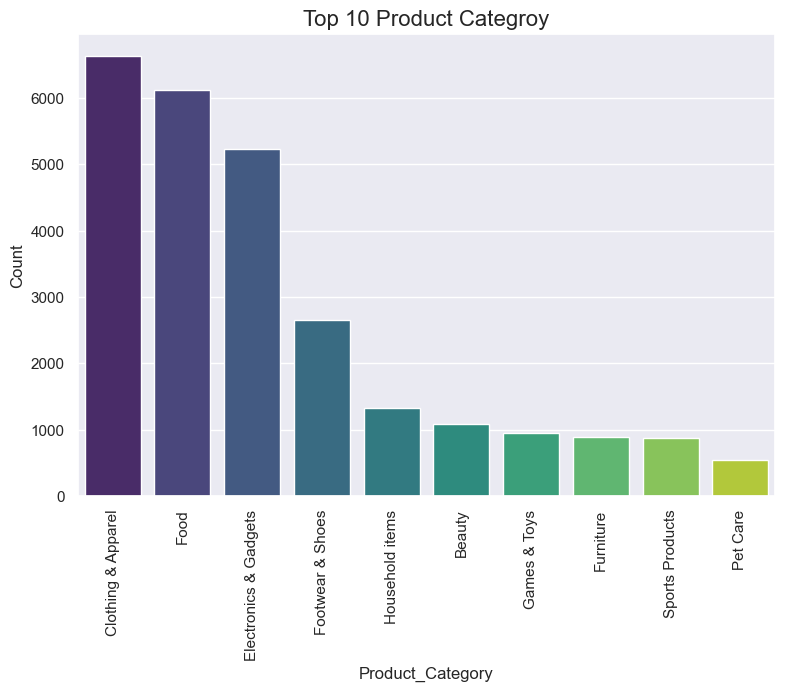

In [34]:
plt.figure(figsize=[9,6])
sns.barplot(data = product, x = 'Product_Category', y= 'Orders',palette = 'viridis')
plt.title('Top 10 Product Categroy',fontsize=16)
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

* ##### There is high demand for products like clothing & apparel and foods.

# Statistical Test: Correlation between numeric columns

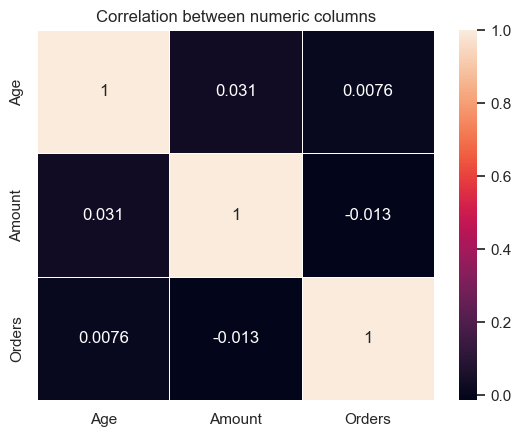

In [35]:
# corr= df.corr(numeric_only= True)
corr= df[['Age', 'Amount', 'Orders']].corr()
sns.heatmap(corr, annot= True, linewidth= 0.5)
plt.title('Correlation between numeric columns')
plt.show()

* ##### There is a very weak positive correlation between age and amount spent, as well as number of orders. This means as age increases, there is a less tendency for customers to spend more and make more orders.
* ##### There is weak negative correlation between number of orders and amount spent. This means, there could be other factors influencing customers spending and orders frequency that are not included in the model.

# Build cluster

In [36]:
df.drop(['User_ID', 'Cust_name', 'Age Group', 'Product_ID', 'State'], axis= 1, inplace= True)

dummies_data= pd.get_dummies(df)
dummies_data.head()

,Age,Orders,Amount,Gender_Female,Gender_Male,Marital_Status_Married,Marital_Status_Unmarried,Zone_Central,Zone_Eastern,Zone_Northern,...,Product_Category_Furniture,Product_Category_Games & Toys,Product_Category_Hand & Power Tools,Product_Category_Household items,Product_Category_Office,Product_Category_Pet Care,Product_Category_Sports Products,Product_Category_Stationery,Product_Category_Tupperware,Product_Category_Veterinary
0,28,1,23952,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,35,3,23934,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,35,3,23924,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16,2,23912,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,28,2,23877,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
for col in dummies_data.columns:
    if dummies_data[col].dtype == 'bool':
        dummies_data[col] = dummies_data[col] * 1

In [38]:
dummies_data.head()

,Age,Orders,Amount,Gender_Female,Gender_Male,Marital_Status_Married,Marital_Status_Unmarried,Zone_Central,Zone_Eastern,Zone_Northern,...,Product_Category_Furniture,Product_Category_Games & Toys,Product_Category_Hand & Power Tools,Product_Category_Household items,Product_Category_Office,Product_Category_Pet Care,Product_Category_Sports Products,Product_Category_Stationery,Product_Category_Tupperware,Product_Category_Veterinary
0,28,1,23952,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35,3,23934,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35,3,23924,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,2,23912,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,2,23877,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_scale = std.fit_transform(dummies_data)
df_scale

array([[-0.58189318, -1.33568906,  2.77782207, ..., -0.10027344,
        -0.08025365, -0.08515613],
       [-0.03302663,  0.45803708,  2.77437336, ..., -0.10027344,
        -0.08025365, -0.08515613],
       [-0.03302663,  0.45803708,  2.77245741, ..., -0.10027344,
        -0.08025365, -0.08515613],
       ...,
       [ 0.3590209 ,  1.35490015, -1.77045658, ..., -0.10027344,
        -0.08025365, -0.08515613],
       [ 0.12379238,  0.45803708, -1.77179775, ..., -0.10027344,
        -0.08025365, -0.08515613],
       [-1.28757875,  0.45803708, -1.77524646, ..., -0.10027344,
        -0.08025365, -0.08515613]])

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = dummies_data.columns

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scale)

In [41]:
df.head()

,Gender,Age,Marital_Status,Zone,Occupation,Product_Category,Orders,Amount,Cluster
0,Female,28,Unmarried,Western,Healthcare,Auto,1,23952,0
1,Female,35,Married,Southern,Govt,Auto,3,23934,1
2,Female,35,Married,Central,Automobile,Auto,3,23924,1
3,Male,16,Unmarried,Southern,Construction,Auto,2,23912,0
4,Male,28,Married,Western,Food Processing,Auto,2,23877,1


In [42]:
df.nunique()

Gender                 2
Age                   81
Marital_Status         2
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Cluster                3
dtype: int64

### Characteristic of Cluster 0:

* Primarily younger individuals (Around 10-30). They are moderate spenders, possibly with stable incomes.
* Higher number of orders for the male compared to the female.
* Lesser product categories belong to it.
* High variance with several outliers while comparing zone wise revenue.
* Have a higher spending across various occupation like Healthcare, IT Sector, Banking Sector.

### Characteristic of Cluster 1:

* Mid-range individuals (around 30-50). With higher disposable incomes, inclined towards premium purchases.
* Slightly higher number of orders for the male than for the female category.
* Most of the product categories belong to it like 30% of electronics, 20% of appreal, 10% of home_decor etc. It occupies higher amount of total revenue.
* Has higher median value compared it cluster 0 but has several outliers while comparing zone wise revenue.
* Mostly belong within the occupation like Retail, Hospitality, Aviation etc with moderate spending pattern and fewer outliers.

### Characteristic of Cluster 2:

* Primarily older individuals (around 50-90). They are mainly budget-conscious and conservative spenders.
* Highest number of orders for female, which is the highest among all clusters.
* Several product categories belong to it and covers a wide range of revenue.
* The distribution of zone revenue is more symetrical.
* Lesser proportion of occupation noticed within it.